In [1]:
import pandas as pd

#first one is the "right way"
df = pd.read_csv("assignment_files/data.csv", index_col=0)
# alternative
# col = [elem for elem in df.columns.tolist() if "Unnamed" not in elem]
# df = df[col]

In [2]:
df.head()

,Unnamed: 0,a,b,c,d
0,0,-0.591023,16,90.296527,'molly'
1,1,0.626541,13,89.357373,'dolly'
2,2,-0.121086,23,95.636287,'molly'
3,3,0.691377,19,95.360784,'molly'
4,4,-0.403012,5,96.244526,'dolly'


In [30]:
result = df.describe()
result.to_dict()
df.columns.tolist()

['a', 'b', 'c', 'd']

In [33]:
def describe(df):
    keys = df.columns.tolist()
    keys.remove("d")
    dicter = {}.fromkeys(keys, {})
    for col in keys:
        dicter[col]["median"] = df[col].median()
        dicter[col]["skew"] = df[col].skew()
        dicter[col]["kurtosis"] = df[col].kurt()
        dicter[col]["variance"] = df[col].var()
        dicter[col]["mode"] = df[col].mode()
        dicter[col]["mean"] = df[col].mean()
        dicter[col]["standard_deviation"] = df[col].std()
    dicter["d"] = {"mode": df["d"].mode()}
    return dicter

describe(df)

{'a': {'kurtosis': -0.0061768430764348459,
  'mean': 90.090165139564107,
  'median': 90.04884369338991,
  'mode': Series([], dtype: float64),
  'skew': 0.0019724849475633429,
  'standard_deviation': 3.9587551434785531,
  'variance': 15.671742286017901},
 'b': {'kurtosis': -0.0061768430764348459,
  'mean': 90.090165139564107,
  'median': 90.04884369338991,
  'mode': Series([], dtype: float64),
  'skew': 0.0019724849475633429,
  'standard_deviation': 3.9587551434785531,
  'variance': 15.671742286017901},
 'c': {'kurtosis': -0.0061768430764348459,
  'mean': 90.090165139564107,
  'median': 90.04884369338991,
  'mode': Series([], dtype: float64),
  'skew': 0.0019724849475633429,
  'standard_deviation': 3.9587551434785531,
  'variance': 15.671742286017901},
 'd': {'mode': 0    'dolly'
  dtype: object}}

In [2]:
import numpy as np
for col in df.columns:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        print("This is a number", col)
    else:
        print("This is a categorical variable", col)

This is a number a
This is a number b
This is a number c
This is a categorical variable d


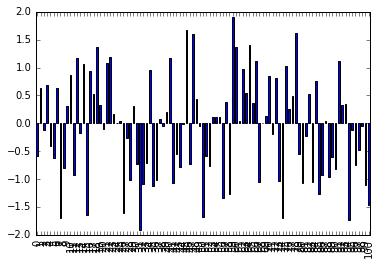

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
df["a"].ix[:100].plot.bar()
plt.show()

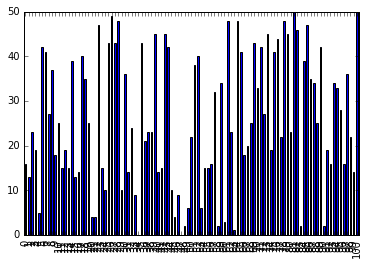

In [4]:
df["b"].ix[:100].plot.bar()

In [ ]:
df["c"].plot.bar()

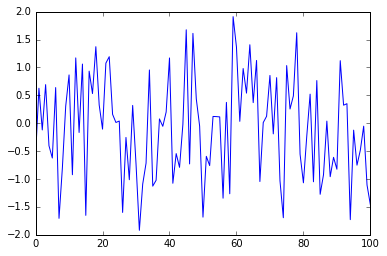

In [5]:
df["a"].ix[:100].plot.line()

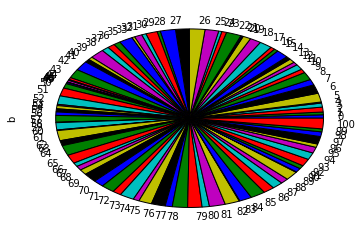

In [7]:
df["b"].ix[:100].plot.pie()

In [22]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df["a"].as_matrix(), order=(2,1,2))
fitted_model = model.fit()

In [35]:
a = list(df["a"])
#fitted_model.predict(start=9995, end=1002)
len(fitted_model.resid)
fitted_model.params
fitted_model.summary()
fitted_model.resid # <- this is the solution to fitting the next value in the sequence

array([ 1.21756732, -0.15221399,  0.73861061, ..., -0.43462627,
        0.71782371, -0.99720526])

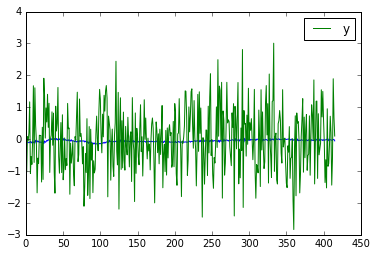

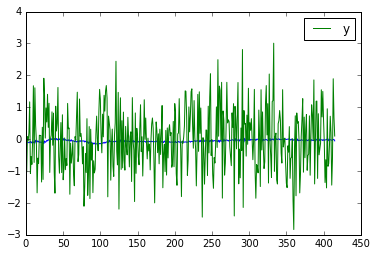

In [39]:
fitted_model.plot_predict(start=35, end=450)

In [41]:
from sklearn import tree
import random
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
X = df[["a", "b", "c"]]
y = df["d"]
decision_tree = BaggingClassifier(tree.DecisionTreeClassifier())
model = decision_tree.fit(X, y)
predicted = model.predict(X)
unique_elems = list(set(y))
mapping = {"'dolly'":0, "'molly'":1}
predicted = [mapping[elem] for elem in predicted]
y = [mapping[elem] for elem in y]
print(metrics.accuracy_score(y, predicted))
success_count = 0
for index, elem in enumerate(y):
    if predicted[index] == elem:
        success_count += 1
print(success_count / len(y))
random_index = random.randint(0,len(y))
y[random_index] == predicted[random_index]
metrics.confusion_matrix(y, predicted)

0.9783
0.9783


array([[4982,   44],
       [ 173, 4801]])